In [1]:
from astropy.table import Table, join, Column
from astropy import units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Read Gaia DR2 IERS quasar data
from my_progs.catalog.read_gaia import read_dr2_iers
from my_progs.vlbi.read_sou import read_sou
from my_progs.catalog.pos_diff import radio_cat_diff_calc
from my_progs.catalog.read_icrf import read_icrf3

icrf3 = read_icrf3(wv="sx")
gaiadr2 = read_dr2_iers()
opa2019a = read_sou("../data/opa2019a/opa2019a.sou")

In [7]:
# Calculate the positional difference of 'opa2019a - ICRF3'
catdif1 = radio_cat_diff_calc(opa2019a, icrf3, sou_name="iers_name")
catdif1 

iers_name,ra_err_1,dec_err_1,pos_err_1,ra,dec,ra_err_2,dec_err_2,pos_err_2,dra,ddec,dra_err,ddec_err,dra_ddec_cov,ang_sep,nor_ra,nor_dec,nor_sep
,mas,mas,mas,deg,deg,mas,mas,,mas,mas,mas,mas,,mas,,,
str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0000+212,0.3227714026518673,0.6656,0.6825372898477584,0.8306250248333333,21.495696754555556,0.09211406408089429,0.17349999999999996,0.17391922837114265,0.09169536393891463,-0.5387999934214348,0.33565812841543546,0.6878412680262794,-0.09265627251009918,0.5465468622898023,0.2731808235116703,-0.7833202491142907,0.7846094454094457
0000-160,0.10883499465751895,0.2665,0.26976319381996644,0.8636006525833333,-15.784848711666667,0.1717687581523203,0.41729999999999995,0.4230788191313842,0.01833162413213757,-0.024799995657076575,0.20334591793122495,0.49513789998342883,-0.037269786016997944,0.030839718350091746,0.09014994900629202,-0.05008704778589273,0.09192840450324671
0000-197,0.13530562452728956,0.2847,0.28480790281012197,0.8278126181249998,-19.456209925444444,0.2043727812594762,0.4265,0.4266174244028753,-0.0318227506484974,0.1106000027562004,0.2451037448682773,0.5127926871553454,-0.00571269169835705,0.11508713250623623,-0.1298338002367098,0.21568170827423525,0.24689228276624797
0000-199,0.08897044874387489,0.202,0.2033722636762636,0.8164558497083333,-19.697333834694444,0.1321846666876117,0.29719999999999996,0.29858965139408694,0.0007061147309007481,0.07659999994302778,0.15933777598862572,0.3593491895079214,-0.012017131339550416,0.07660325443011577,0.004431558847358042,0.21316313541132736,0.2190150181582355
0001+459,0.0761978029452591,0.096,0.09604312110372142,1.0671985290416666,46.254991851444444,0.11585246722802883,0.14079999999999998,0.1408340404339771,-0.049576973122527505,0.07810000965946527,0.13866470111930446,0.17041314503288763,0.00041618756516587026,0.09250669042183048,-0.35753131635045626,0.4582980358961918,0.5862970005132894
0001+478,0.27712121198729794,0.3368,0.3413063660084459,0.9418399126666667,48.117815351694446,0.4151811175793566,0.5023,0.5092864467663827,0.03264569331091488,0.18490000570636764,0.49917083901982146,0.6047640283614758,-0.03580951907560116,0.18775982904222377,0.06539984061372335,0.3057390933242649,0.32242844458341063
0001-120,0.04698285427676161,0.1022,0.10232313083425612,1.0204791709583332,-11.81621839238889,0.07282342412197838,0.14839999999999998,0.14862223343295053,-0.025693747426356984,0.09480000144890253,0.08666394692627932,0.18018712495625205,-0.0015087579561800133,0.09822020633006912,-0.29647562034317876,0.526119729541826,0.5811291355683695
0002+051,0.21523943085225689,0.2484,0.25928413448621895,1.3342312922499997,5.403000997444445,0.16441624418151832,0.31449999999999995,0.3147054323091073,-0.5825501973635311,-0.8101999998899599,0.2708518302400043,0.40076528043232484,0.007695734780453661,0.9978921646500588,-2.150807682736823,-2.0216322107942037,2.852600730028903


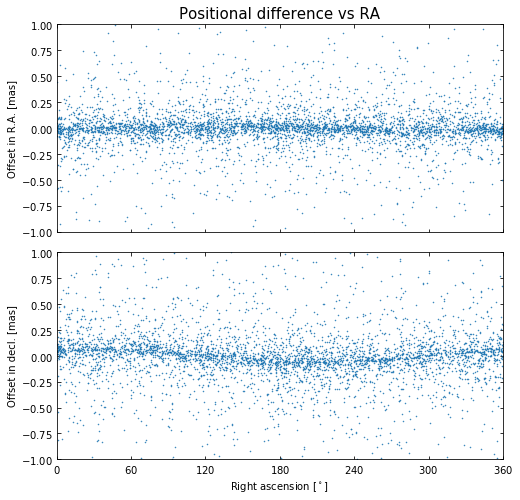

In [12]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 8), nrows=2, sharex=True)

ax0.plot(catdif1["ra"], catdif1["dra"], ".", ms=1)
ax1.plot(catdif1["ra"], catdif1["ddec"], ".", ms=1)

ax0.set_ylabel("Offset in R.A. [mas]")

ax1.set_xlabel("Right ascension [$^\circ$]")
ax1.set_ylabel("Offset in decl. [mas]")

ax1.set_xticks(np.arange(0, 361, 60))

ax0.set_xlim([0, 360])
ax0.set_ylim([-1, 1])
ax1.set_ylim([-1, 1])

ax0.set_title("Positional difference vs RA", fontsize=15)

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.1)

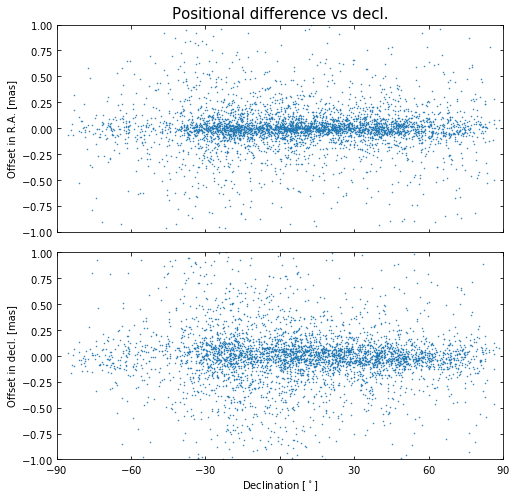

In [14]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 8), nrows=2, sharex=True)

ax0.plot(catdif1["dec"], catdif1["dra"], ".", ms=1)
ax1.plot(catdif1["dec"], catdif1["ddec"], ".", ms=1)

ax0.set_ylabel("Offset in R.A. [mas]")

ax1.set_xlabel("Declination [$^\circ$]")
ax1.set_ylabel("Offset in decl. [mas]")

ax1.set_xticks(np.arange(-90, 91, 30))

ax0.set_xlim([-90, 90])
ax0.set_ylim([-1, 1])
ax1.set_ylim([-1, 1])

ax0.set_title("Positional difference vs decl.", fontsize=15)

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.1)

In [15]:
# My modules
from my_progs.catalog.vsh_deg2_cor import vsh_deg02_fitting

# icrf2-ga-19 - icrf3-ga-19
# Transform columns into np.array
dra1 = np.array(catdif1["dra"])
ddec1 = np.array(catdif1["ddec"])
dra_err1 = np.array(catdif1["dra_err"])
ddec_err1 = np.array(catdif1["ddec_err"])
ra_rad1 = np.array(catdif1["ra"].to(u.radian))
dec_rad1 = np.array(catdif1["dec"].to(u.radian))
dra_ddec_cov1 = np.array(catdif1["dra_ddec_cov"])

# Transformation parameters
# l_max = 2
par1, sig1, _, _, _, _ = vsh_deg02_fitting(
    dra1, ddec1, ra_rad1, dec_rad1, dra_err1, ddec_err1,
#     cov=dra_ddec_cov1, elim_flag="None")
         elim_flag="None")

# mas -> uas
par1 = par1 * 1.e3
sig1 = sig1 * 1.e3

# Print results
print("Estimates (%6d sources)\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "                 Rotation [uas]                  "
      "                 Glide [uas]               \n"
      "             x             y             z"
      "             x             y             z\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "        %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f"
      "        %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "----------------------------------------------"
      "----------------------------------------------\n" %
      (dra1.size,
       par1[3], sig1[3], par1[4], sig1[4], par1[5], sig1[5],
       par1[0], sig1[0], par1[1], sig1[1], par1[2], sig1[2],))

quad_names = Column(["ER22", "EI22", "ER21", "EI21", "E20",
                     "MR22", "MI22", "MR21", "MI21", "M20"])

print("Positional difference")
t_quad1 = Table([quad_names, par1[6:], sig1[6:]],
                names=["Quadrupolar term", "Estimate", "Error"])
t_quad1["Estimate"].format = "%5.0f"
t_quad1["Error"].format = "%5.0f"
print(t_quad1)

Estimates (  4439 sources)
--------------------------------------------------------------------------------------------
                 Rotation [uas]                                   Glide [uas]               
             x             y             z             x             y             z
--------------------------------------------------------------------------------------------
         +28 +/-  50   -50 +/-  49    -1 +/-  39          -4 +/-  46    -5 +/-  45    +3 +/-  49
--------------------------------------------------------------------------------------------

Positional difference
Quadrupolar term Estimate Error
---------------- -------- -----
            ER22       -1    26
            EI22       -0    26
            ER21       -3    57
            EI21        1    59
             E20       -3    56
            MR22       -1    29
            MI22       -2    30
            MR21        1    55
            MI21       -4    57
             M20        2    47


In [8]:
# Calculate the positional difference
catdif2 = radio_cat_diff_calc(opa2019a, gaiadr2, sou_name="iers_name")
catdif2

iers_name,ra_err_1,dec_err_1,pos_err_1,ra,ra_err_2,dec,dec_err_2,pos_err_2,dra,ddec,dra_err,ddec_err,dra_ddec_cov,ang_sep,nor_ra,nor_dec,nor_sep
,mas,mas,mas,deg,mas,deg,mas,mas,mas,mas,mas,mas,,mas,,,
str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0000-197,0.13530562452728956,0.2847,0.28480790281012197,0.8278123681512258,0.2387757610163772,-19.456209949035525,0.1922200644996743,0.24241216451703895,0.8166949312327431,0.19552789467525142,0.27444758347937764,0.3435151280457077,0.0042137462923013905,0.839774831902809,2.9757774540365394,0.5691973328442022,3.0076398115435583
0000-199,0.08897044874387489,0.202,0.2033722636762636,0.8164555380378795,0.31214484752059934,-19.697333393384483,0.20132065134575663,0.31218319151974,1.0570665035202909,-1.5121158597253268,0.32457687314925054,0.2851911721254354,-0.0031458881729585467,1.8449617790343185,3.256752378146852,-5.3021131350456185,6.130951345535799
0001+459,0.0761978029452591,0.096,0.09604312110372142,1.0671982239853723,0.7718284266351787,46.25499167308568,0.6969576827283192,0.777985787941841,0.7097753872043119,0.7201915735777219,0.7755805730778846,0.7035382089936754,-0.033602657874077464,1.0111661599032011,0.9151536434023541,1.0236708744047707,1.4171832690001014
0001-120,0.04698285427676161,0.1022,0.10232313083425612,1.0204794846922574,0.3102386470908995,-11.816218379326092,0.29214212886423696,0.33998919727933147,-1.13120239045704,0.04777392561550186,0.3137760455241654,0.30950260654367423,0.0237324920898794,1.1322107560628618,-3.6051266710540553,0.15435710267196226,3.7599206611591476
0002+051,0.21523943085225689,0.2484,0.25928413448621895,1.3342312881365477,0.055566707261366505,5.403000767650242,0.043549317950419074,0.06716510720786427,-0.5678075636319769,0.017059131707242155,0.2222963597305945,0.252188626020181,0.012675776841762418,0.5680637669243538,-2.5542818799197367,0.06764433422892366,2.6387597737592414
0002+541,0.06310508726211235,0.0725,0.0733331163745467,1.2681808047501304,0.13120835916273907,54.47359019646749,0.13042564468464754,0.14545837311323823,-0.4401669725476049,-0.1966829643151868,0.14559493656215228,0.14922164317352202,-0.004455361664635197,0.4821111408933971,-3.023229948382884,-1.3180592314378585,3.6139723106956207
0002-170,0.08529658308658815,0.2068,0.20771409349764455,1.324724085562965,0.12209945018003658,-16.8012994100183,0.09340584476751623,0.12802895680534068,0.14151318275753447,-0.6069341253578385,0.14894221302409358,0.2269160457894799,-0.00031454915753765297,0.6232134573467198,0.9501213919430795,-2.67470783410759,2.830226711815307
0002-478,0.03607142268861597,0.0627,0.06406552894941371,1.1485644787260738,0.32535001967377664,-47.60544549244506,0.38175267275937685,0.4046925099699907,0.06842521990958202,-0.18059780870771644,0.32734352420127033,0.38686741030865845,-0.03162973210074084,0.193125811919856,0.20903184224139443,-0.46682094147870506,0.4764817427525781


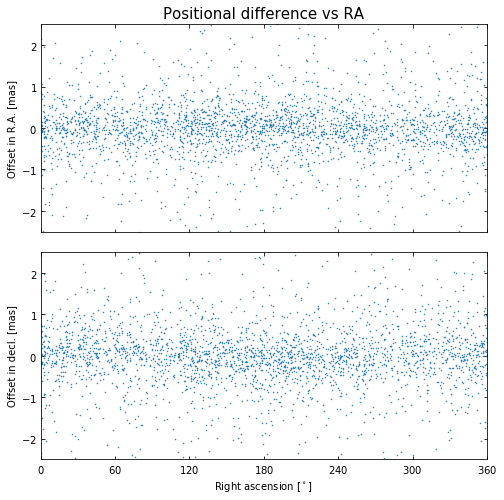

In [19]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 8), nrows=2, sharex=True)

ax0.plot(catdif2["ra"], catdif2["dra"], ".", ms=1)
ax1.plot(catdif2["ra"], catdif2["ddec"], ".", ms=1)

ax0.set_ylabel("Offset in R.A. [mas]")

ax1.set_xlabel("Right ascension [$^\circ$]")
ax1.set_ylabel("Offset in decl. [mas]")

ax1.set_xticks(np.arange(0, 361, 60))

ax0.set_xlim([0, 360])
ax0.set_ylim([-2.5, 2.5])
ax1.set_ylim([-2.5, 2.5])

ax0.set_title("Positional difference vs RA", fontsize=15)

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.1)

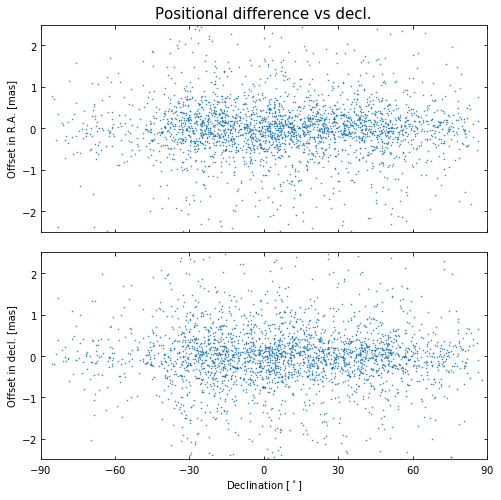

In [20]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 8), nrows=2, sharex=True)

ax0.plot(catdif2["dec"], catdif2["dra"], ".", ms=1)
ax1.plot(catdif2["dec"], catdif2["ddec"], ".", ms=1)

ax0.set_ylabel("Offset in R.A. [mas]")

ax1.set_xlabel("Declination [$^\circ$]")
ax1.set_ylabel("Offset in decl. [mas]")

ax1.set_xticks(np.arange(-90, 91, 30))

ax0.set_xlim([-90, 90])
ax0.set_ylim([-2.5, 2.5])
ax1.set_ylim([-2.5, 2.5])

ax0.set_title("Positional difference vs decl.", fontsize=15)

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.1)

In [22]:
# opa2019a - Gaia DR2
# Transform columns into np.array
dra2 = np.array(catdif2["dra"])
ddec2 = np.array(catdif2["ddec"])
dra_err2 = np.array(catdif2["dra_err"])
ddec_err2 = np.array(catdif2["ddec_err"])
ra_rad2 = np.array(catdif2["ra"].to(u.radian))
dec_rad2 = np.array(catdif2["dec"].to(u.radian))
dra_ddec_cov2 = np.array(catdif2["dra_ddec_cov"])

# Transformation parameters
# l_max = 2
par2, sig2, _, _, _, _ = vsh_deg02_fitting(
    dra2, ddec2, ra_rad2, dec_rad2, dra_err2, ddec_err2,
#     cov=dra_ddec_cov2, elim_flag="None")
         elim_flag="None")

# mas -> uas
par2 = par2 * 1.e3
sig2 = sig2 * 1.e3

# Print results
print("Estimates (%6d sources)\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "                 Rotation [uas]                  "
      "                 Glide [uas]               \n"
      "             x             y             z"
      "             x             y             z\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "        %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f"
      "        %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "----------------------------------------------"
      "----------------------------------------------\n" %
      (dra2.size,
       par2[3], sig2[3], par2[4], sig2[4], par2[5], sig2[5],
       par2[0], sig2[0], par2[1], sig2[1], par2[2], sig2[2],))

quad_names = Column(["ER22", "EI22", "ER21", "EI21", "E20",
                     "MR22", "MI22", "MR21", "MI21", "M20"])

print("Positional difference")
t_quad2 = Table([quad_names, par2[6:], sig2[6:]],
                names=["Quadrupolar term", "Estimate", "Error"])
t_quad2["Estimate"].format = "%5.0f"
t_quad2["Error"].format = "%5.0f"
print(t_quad2)

print(" %+4.0f %3.0f  %+4.0f %3.0f  %+4.0f %3.0f"
      " %+4.0f %3.0f  %+4.0f %3.0f  %+4.0f %3.0f" % 
      (par2[3], sig2[3], par2[4], sig2[4], par2[5], sig2[5],
       par2[0], sig2[0], par2[1], sig2[1], par2[2], sig2[2]))

Estimates (  2799 sources)
--------------------------------------------------------------------------------------------
                 Rotation [uas]                                   Glide [uas]               
             x             y             z             x             y             z
--------------------------------------------------------------------------------------------
         +65 +/-  29  -115 +/-  27   -40 +/-  27         -15 +/-  28   +51 +/-  27    -3 +/-  28
--------------------------------------------------------------------------------------------

Positional difference
Quadrupolar term Estimate Error
---------------- -------- -----
            ER22       22    17
            EI22       -1    17
            ER21       44    32
            EI21      -56    34
             E20       46    32
            MR22       -3    17
            MI22      -16    18
            MR21       59    33
            MI21       72    34
             M20       -8    29
  +65  29  -